# Unsupervised

Predict CO2 consumption
* K-NN
* D Tree
* N Bayes

get R2 and RMSE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv("../data/Lecture_3_Fuel_Consumption.csv")
df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL CONSUMPTION in CITY(L/100 km),FUEL CONSUMPTION in HWY(L/100 km),FUEL CONSUMPTION in COMB(L/100 km),CO2 EMISSIONS(g/km)
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,9.9,6.7,8.5,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,11.2,7.7,9.6,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,6.0,5.8,5.9,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,12.7,9.1,11.1,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,12.1,8.7,10.6,244


In [4]:
df.isnull().sum()

MODEL YEAR                            0
MAKE                                  0
MODEL                                 0
VEHICLE CLASS                         0
ENGINE SIZE (L)                       0
CYLINDERS                             0
TRANSMISSION                          0
FUEL CONSUMPTION in CITY(L/100 km)    0
FUEL CONSUMPTION in HWY(L/100 km)     0
FUEL CONSUMPTION in COMB(L/100 km)    0
CO2 EMISSIONS(g/km)                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MODEL YEAR                          1071 non-null   int64  
 1   MAKE                                1071 non-null   object 
 2   MODEL                               1071 non-null   object 
 3   VEHICLE CLASS                       1071 non-null   object 
 4   ENGINE SIZE (L)                     1071 non-null   float64
 5   CYLINDERS                           1071 non-null   int64  
 6   TRANSMISSION                        1071 non-null   object 
 7   FUEL CONSUMPTION in CITY(L/100 km)  1071 non-null   float64
 8   FUEL CONSUMPTION in HWY(L/100 km)   1071 non-null   float64
 9   FUEL CONSUMPTION in COMB(L/100 km)  1071 non-null   float64
 10  CO2 EMISSIONS(g/km)                 1071 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory u

In [8]:
df.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE (L)',
       'CYLINDERS', 'TRANSMISSION', 'FUEL CONSUMPTION in CITY(L/100 km)',
       'FUEL CONSUMPTION in HWY(L/100 km)',
       'FUEL CONSUMPTION in COMB(L/100 km)', 'CO2 EMISSIONS(g/km)'],
      dtype='object')

In [12]:
features = ['ENGINE SIZE (L)','CYLINDERS','FUEL CONSUMPTION in CITY(L/100 km)', 'FUEL CONSUMPTION in HWY(L/100 km)', 'FUEL CONSUMPTION in COMB(L/100 km)']

In [21]:
X = df[features].values
y = df[['CO2 EMISSIONS(g/km)']].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [24]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (856, 5) (856, 1)
Test set: (215, 5) (215, 1)


In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
# Evaluation
from sklearn import metrics
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % metrics.r2_score(y_test, y_pred))

Mean squared error: 154.11
R2 score: 0.96


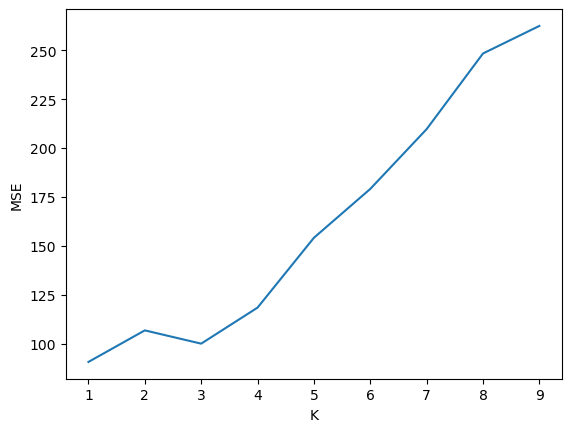

In [71]:
Ks = 10
mse = []

for n in range(1,Ks):
    model = KNeighborsRegressor(n_neighbors = n).fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse.append(metrics.mean_squared_error(y_test, y_pred))

# decrease y axis
plt.plot(range(1,Ks),mse)
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

In [76]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))
print('R2 score: %.2f' % metrics.r2_score(y_test, y_pred))

Mean squared error: 99.99
Mean absolute error: 3.78
R2 score: 0.98


In [73]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))
print('R2 score: %.2f' % metrics.r2_score(y_test, y_pred))

Mean squared error: 118.63
Mean absolute error: 2.93
R2 score: 0.97


In [67]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))
print('R2 score: %.2f' % metrics.r2_score(y_test, y_pred))

Mean squared error: 626.68
Mean absolute error: 12.93
R2 score: 0.84


/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
